In [2]:
# 读取jazz数据集
import os
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
file_name = "Jazz.txt"
data = []
for line in open(file_name,'r'):
    data.append([int(i) for i in line.split()])

In [3]:
jazz_data = np.array(data)
jazz_data

array([[  1,   8,   1],
       [  1,  24,   1],
       [  1,  35,   1],
       ...,
       [167, 198,   1],
       [176, 198,   1],
       [184, 198,   1]])

In [4]:
#使用networkx创建graph
graph_jazz = nx.Graph()
graph_jazz.add_nodes_from(list(range(1,np.max(jazz_data)+1)))

In [5]:
graph_jazz.node

NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198))

In [6]:
graph_jazz.add_edges_from(jazz_data[:,:2])

In [7]:
graph_jazz.number_of_edges()

2742

In [8]:
graph_jazz.edges

EdgeView([(1, 8), (1, 24), (1, 35), (1, 42), (1, 46), (1, 60), (1, 74), (1, 78), (1, 81), (1, 95), (1, 98), (1, 99), (1, 100), (1, 101), (1, 103), (1, 104), (1, 108), (1, 131), (1, 132), (1, 154), (1, 159), (1, 168), (1, 171), (2, 14), (2, 54), (2, 150), (3, 115), (3, 153), (3, 167), (3, 172), (4, 5), (4, 13), (4, 26), (4, 77), (4, 85), (4, 102), (4, 138), (4, 147), (4, 153), (4, 156), (4, 167), (4, 169), (4, 172), (4, 173), (4, 176), (4, 189), (5, 13), (5, 19), (5, 21), (5, 26), (5, 27), (5, 28), (5, 29), (5, 51), (5, 53), (5, 54), (5, 57), (5, 73), (5, 75), (5, 76), (5, 77), (5, 79), (5, 85), (5, 86), (5, 90), (5, 96), (5, 97), (5, 102), (5, 124), (5, 126), (5, 128), (5, 136), (5, 138), (5, 140), (5, 144), (5, 147), (5, 149), (5, 153), (5, 155), (5, 156), (5, 163), (5, 167), (5, 169), (5, 172), (5, 173), (5, 176), (5, 189), (5, 191), (5, 194), (5, 196), (5, 197), (6, 152), (6, 157), (7, 10), (7, 11), (7, 14), (7, 19), (7, 36), (7, 49), (7, 53), (7, 55), (7, 56), (7, 57), (7, 60), (7,

In [9]:
#从h-hop的邻接矩阵中寻找特定节点的邻居返回点的集合
def set_of_h_hop_nodes(adj_matrix,node_1,node_2):
    adj_matrix_dense = adj_matrix.todense()
    adj_node_1 = np.array(adj_matrix_dense[node_1-1]).reshape(-1)
    adj_node_2 = np.array(adj_matrix_dense[node_2-1]).reshape(-1)
    node_1_set = np.where(adj_node_1 != 0)[0] + 1
    node_2_set = np.where(adj_node_2 != 0)[0] + 1
    print(node_1_set)
    print(node_2_set)
    return np.unique(np.append(node_1_set,node_2_set))         

#构建subgraph函数，输入为节点编号和跳数，输出点集
def subgraph(Graph,Node_1,Node_2,hops):
    Adj_matrix_G = nx.adjacency_matrix(Graph)
    adj_matrix = Adj_matrix_G ** hops
    #将低于h-hops的得到的结果存储于一个list中用于去除重复元素
    forward_hops_nodes_sets = []
    for i in range(hops-1):
        temp_adj_matrix = Adj_matrix_G ** i
        forward_hops_nodes_sets.append(set_of_h_hop_nodes(temp_adj_matrix,Node_1,Node_2))
    h_hops_nodes_sets = set_of_h_hop_nodes(adj_matrix,Node_1,Node_2)
    forward_hops_nodes_sets = np.array(forward_hops_nodes_sets).reshape(-1)
    #h跳下的节点的集合与小于h跳下的节点的集合之间的差集
    difference_set_h_hops_nodes = np.setdiff1d(h_hops_nodes_sets,forward_hops_nodes_sets)
    return difference_set_h_hops_nodes

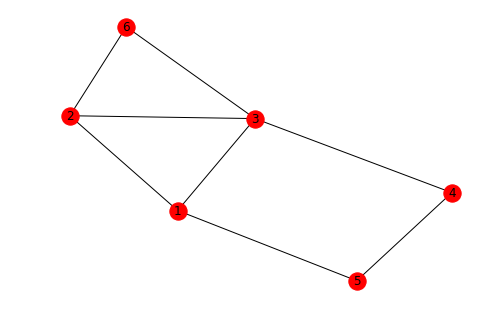

In [10]:
G_test = nx.Graph()
G_test.add_nodes_from(list(range(1,7)))
G_test.add_edges_from([(1,2),(1,3),(1,5),(2,3),(2,6),(3,4),(3,6),(4,5)])
nx.draw(G_test,with_labels=True)

In [11]:
adj_test = nx.adj_matrix(G_test)
adj_test_2 = adj_test * adj_test
adj_test_2.todense()
set_of_h_hop_nodes(adj_test,1,2)

[2 3 5]
[1 3 6]


array([1, 2, 3, 5, 6], dtype=int64)

In [53]:
result_test

array([1, 2, 3, 5, 6], dtype=int64)

In [38]:
set_of

matrix([[2, 6, 8, 1, 5, 2],
        [6, 4, 6, 3, 2, 5],
        [8, 6, 4, 6, 1, 6],
        [1, 3, 6, 0, 4, 1],
        [5, 2, 1, 4, 0, 3],
        [2, 5, 6, 1, 3, 2]], dtype=int32)